In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.svm import SVR
import sklearn
%matplotlib inline

In [3]:
#Lendo o dataset
trip_dataset = pd.read_csv('../Datasets/trip_dataset.csv')

In [4]:
x = trip_dataset[['pickup_longitude','pickup_latitude','dropoff_longitude',
                 'dropoff_latitude','pickup_datetime_int','distance','rain','temp','snow','windspeed']].fillna(0)

In [5]:
trip_dataset['trip_duration'] = np.log(trip_dataset['trip_duration'])
y = trip_dataset['trip_duration']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [8]:
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
Y_pred = svr.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(y_train, Y_pred)))

1.7363974538


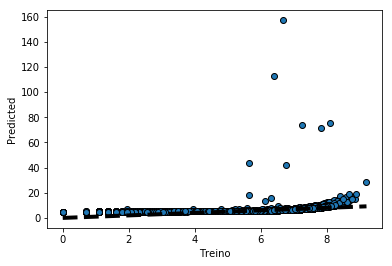

In [10]:
#http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py
fig, ax = plt.subplots()
ax.scatter(y_train, Y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Treino')
ax.set_ylabel('Predicted')
plt.show()

In [11]:
pred_svr = svr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, pred_svr)))

1.38173403832


In [12]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [ ]:
results = model_selection.cross_val_score(svr, x, y, cv=kfold)
Y_pred =  model_selection.cross_val_predict(svr, x, y, cv=kfold)
print(np.sqrt(results.mean()))